In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [29]:
# from google.colab import drive
# drive.mount('/content/drive')

In [30]:
data_train_path = "D:\\uni\\366\\assignment3\\data\\CoLeaf DATASET\\CoLeaf DATASET"

In [31]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [32]:
img_width = 150
img_height = 150

In [33]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 10,
    subset = 'training',
    seed = 123,
    validation_split = 0.2
)

category = data_train.class_names
print(category)

Found 1006 files belonging to 10 classes.
Using 805 files for training.
['boron-B', 'calcium-Ca', 'healthy', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'more-deficiencies', 'nitrogen-N', 'phosphorus-P', 'potasium-K']


In [34]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    subset = 'validation',
    seed = 123,
    validation_split = 0.2
)


Found 1006 files belonging to 10 classes.
Using 201 files for validation.


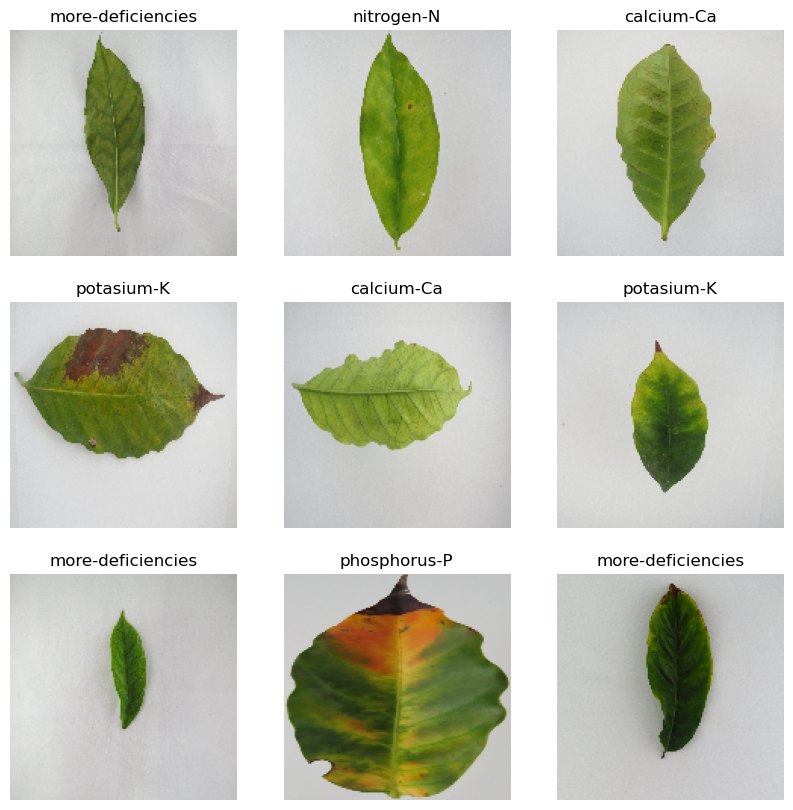

In [35]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(category[labels[i]])
        plt.axis('off')

In [36]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(category))
])

In [37]:
model.compile(optimizer=Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [38]:
history = model.fit(data_train, validation_data=data_test, epochs=20)

Epoch 1/20
90/90 [==============================] - 12s 114ms/step - loss: 2.1902 - accuracy: 0.2733 - val_loss: 1.0974 - val_accuracy: 0.6169
Epoch 2/20
90/90 [==============================] - 11s 117ms/step - loss: 1.7217 - accuracy: 0.3963 - val_loss: 0.6617 - val_accuracy: 0.7910
Epoch 3/20
90/90 [==============================] - 10s 104ms/step - loss: 1.4462 - accuracy: 0.4857 - val_loss: 0.8000 - val_accuracy: 0.7214
Epoch 4/20
90/90 [==============================] - 10s 102ms/step - loss: 1.2063 - accuracy: 0.5727 - val_loss: 0.5470 - val_accuracy: 0.7761
Epoch 5/20
90/90 [==============================] - 10s 107ms/step - loss: 1.0533 - accuracy: 0.6224 - val_loss: 0.5507 - val_accuracy: 0.7861
Epoch 6/20
90/90 [==============================] - 10s 103ms/step - loss: 0.8591 - accuracy: 0.6733 - val_loss: 0.3117 - val_accuracy: 0.8905
Epoch 7/20
90/90 [==============================] - 9s 98ms/step - loss: 0.8493 - accuracy: 0.6882 - val_loss: 0.4095 - val_accuracy: 0.8358
E

Text(0.5, 1.0, 'Loss')

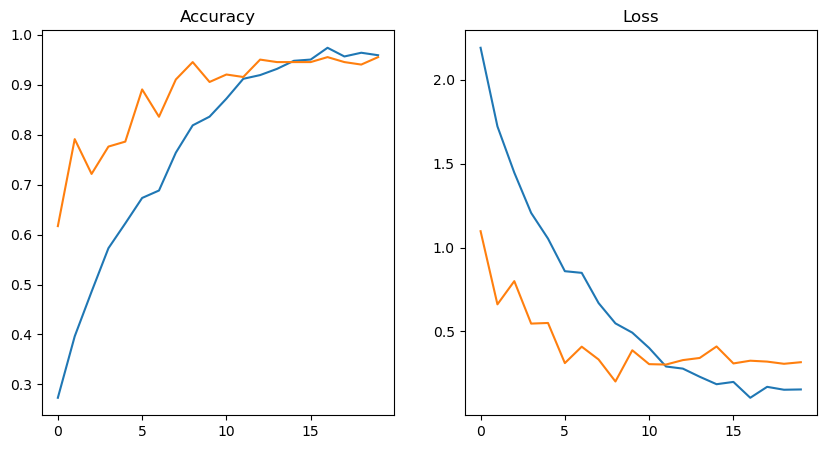

In [39]:
epochs_range = range(20)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [45]:
image = r"D:\uni\366\assignment3\data\CoLeaf DATASET\CoLeaf DATASET\calcium-Ca\calcium-Ca\Ca (46).jpg"
image = tf.keras.utils.load_img(image, target_size=(150, 150))
img_arr = tf.keras.utils.array_to_img(image)
img_batch = tf.expand_dims(img_arr,0)

In [46]:
predict = model.predict(img_batch)
score = tf.nn.softmax(predict)
print('This is {} with accuracy of {:0.2f}'.format(category[np.argmax(score)], np.max(score)*100))

1/1 [==============================] - 0s 24ms/step
This is calcium-Ca with accuracy of 97.94


In [47]:
model.save('CNN_CoLeaf.keras')